In [2]:
using Pkg
Pkg.activate("../../Tambo/")
# using Tambo

  Activating project at `~/research/TAMBO-MC/Tambo`


In [3]:
using HDF5
using Plots
using QuadGK
using Dierckx
using Roots

┌ Info: Precompiling HDF5 [f67ccb44-e63f-5c2f-98bd-6dc0ccc4ba2f]
└ @ Base loading.jl:1664
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664
┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1664
┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1664


In [4]:
h5f = h5open("/Users/jlazar/Downloads/hedis_csms_nu_tau_n.h5")

🗂️ HDF5.File: (read-only) /Users/jlazar/Downloads/hedis_csms_nu_tau_n.h5
├─ 🔢 dsdy_CC_nu
├─ 🔢 dsdy_CC_nubar
├─ 🔢 dsdy_NC_nu
├─ 🔢 dsdy_NC_nubar
├─ 🔢 energies
├─ 🔢 s_CC_nu
├─ 🔢 s_CC_nubar
├─ 🔢 s_NC_nu
├─ 🔢 s_NC_nubar
└─ 🔢 zs

In [8]:
# for idx in 1:size(cdfs)[1]
#     zs = h5f["zs"][:]
#     y =  h5f["dsdy_CC_nu"][idx,:]
#     logzs = reverse(1 .- 10 .^ LinRange(-5, 0, 551))
#     fit1 = Spline1D(zs, y , w=ones(length(zs)), k=1, bc="nearest", s=0.001)
#     f(x) = 10 ^(fit1(x)) / 10^(fit1(0))
#     cdfs[idx,:] = [quadgk(f, 0, z)[1] for z in logzs]
# end

In [113]:
1 .- zs

551-element Vector{Float64}:
 1.0
 0.9981818181818182
 0.9963636363636363
 0.9945454545454545
 0.9927272727272727
 0.990909090909091
 0.9890909090909091
 0.9872727272727273
 0.9854545454545455
 0.9836363636363636
 0.9818181818181818
 0.98
 0.9781818181818182
 ⋮
 0.020000000000000018
 0.018181818181818188
 0.016363636363636358
 0.014545454545454528
 0.012727272727272698
 0.010909090909090868
 0.009090909090909038
 0.0072727272727273196
 0.00545454545454549
 0.0036363636363636598
 0.0018181818181818299
 0.0

11.000000000000433


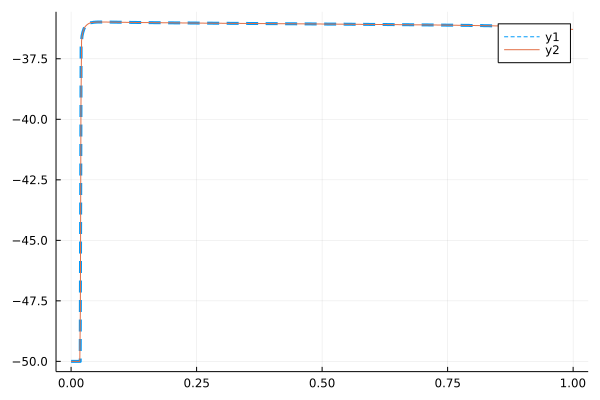

11.2


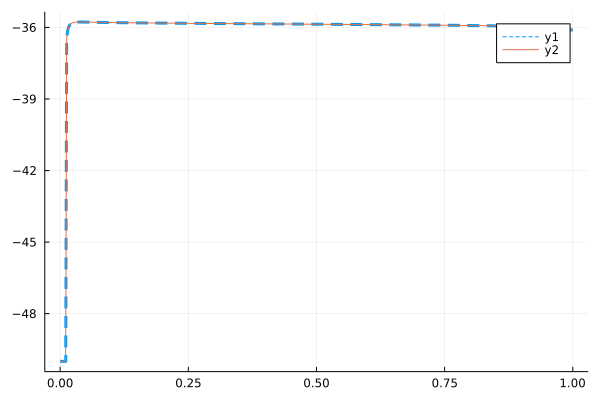

11.4


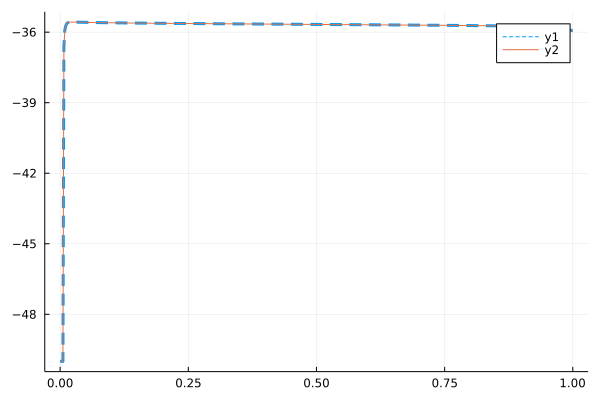

11.6


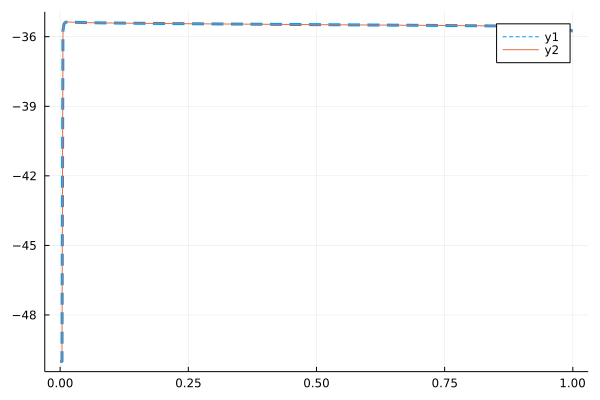

11.8


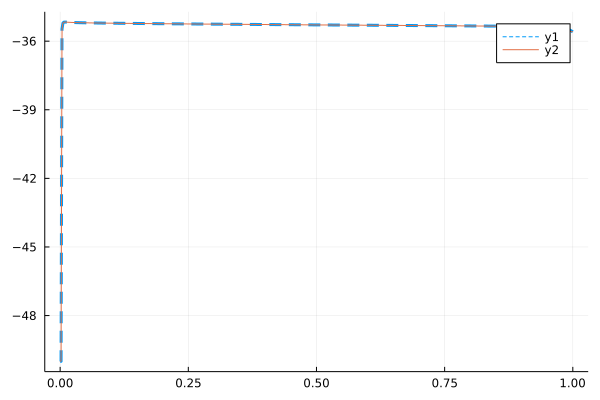

12.0


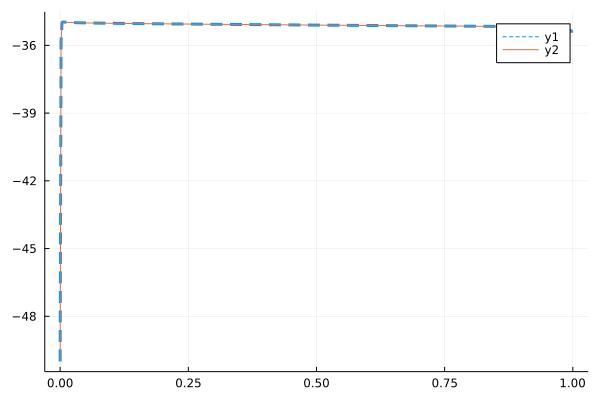

12.2


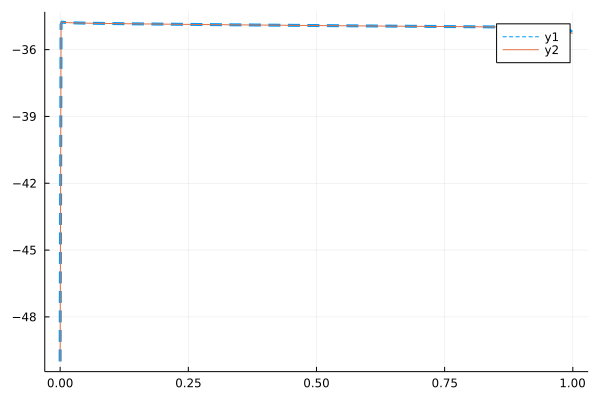

12.4


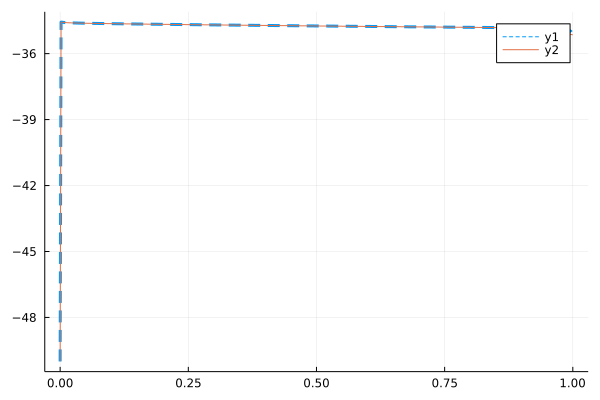

12.600000000000001


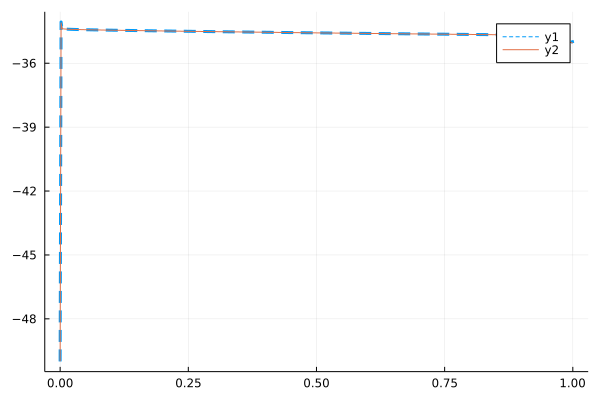

12.8


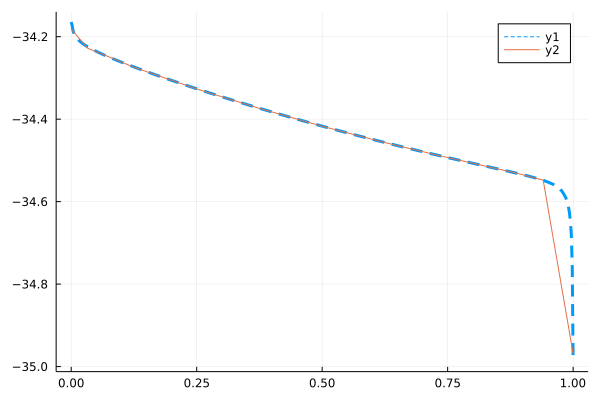

13.0


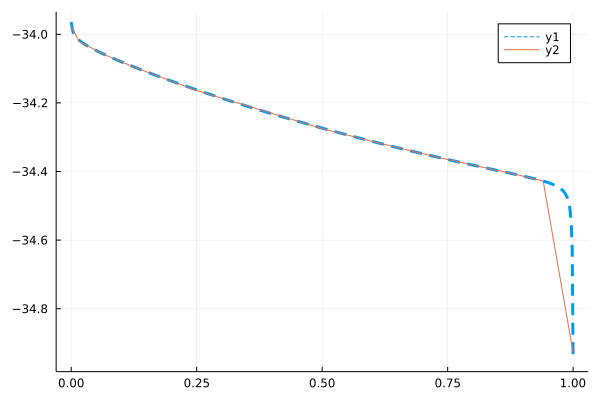

13.2


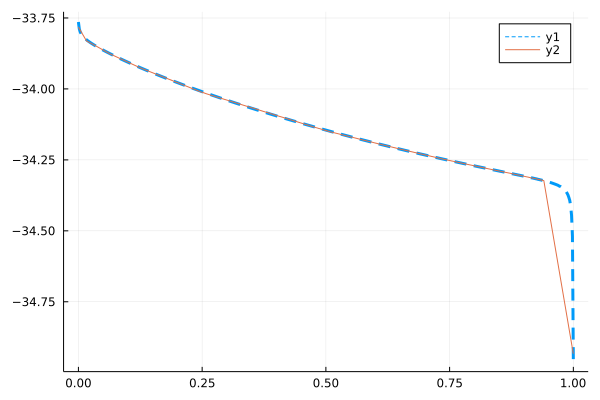

13.4


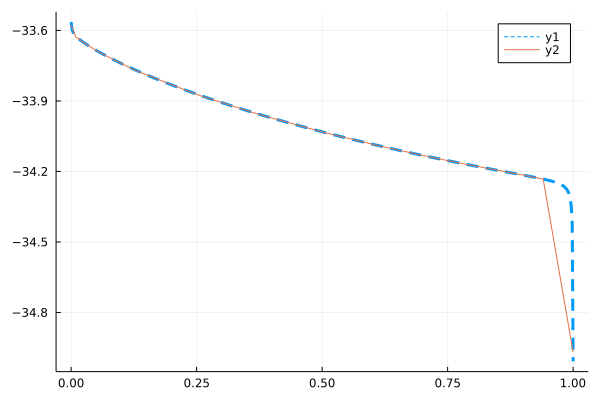

13.6


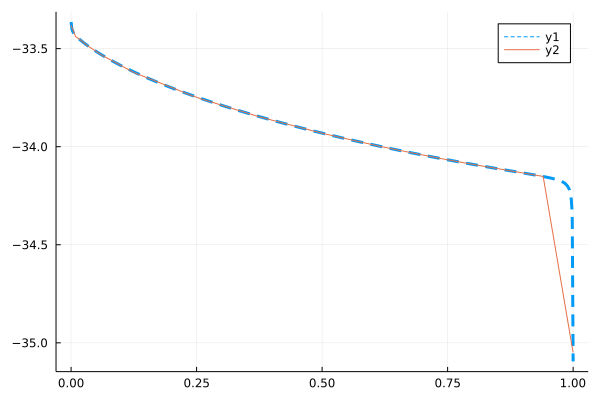

13.8


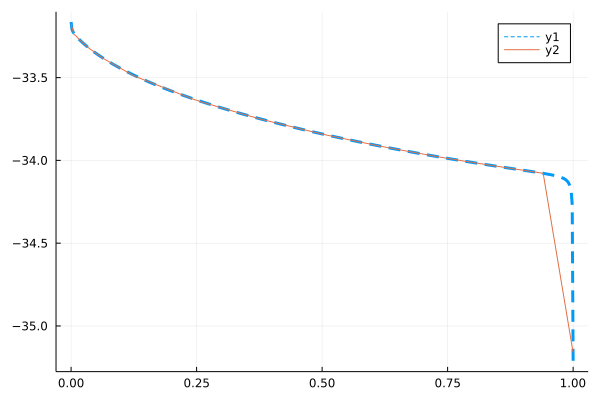

14.0


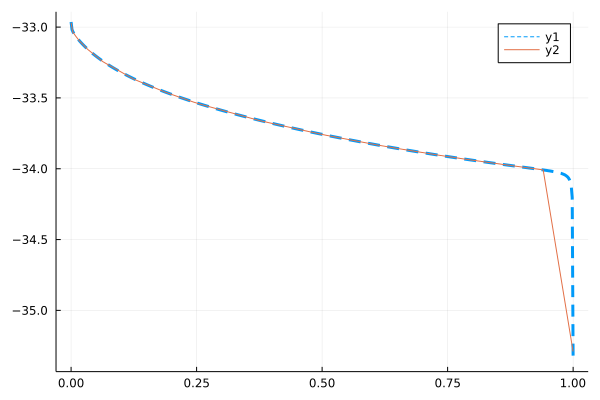

14.2


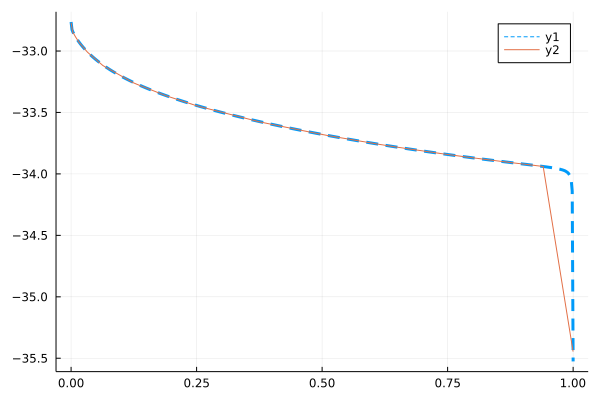

14.4


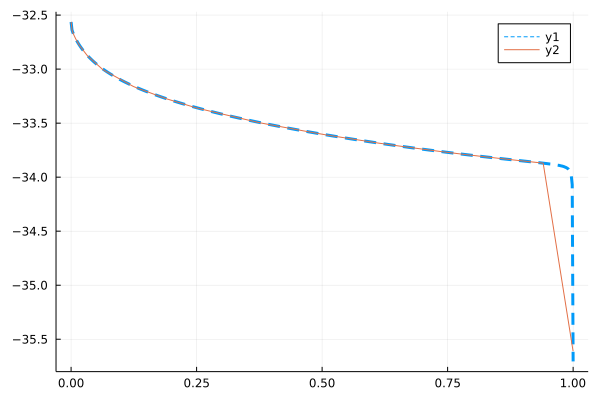

14.6


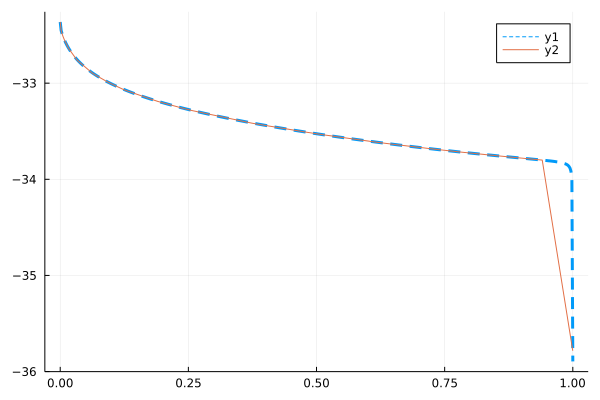

14.8


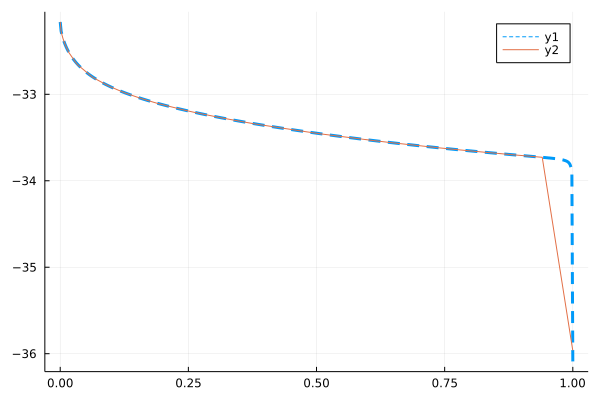

15.0


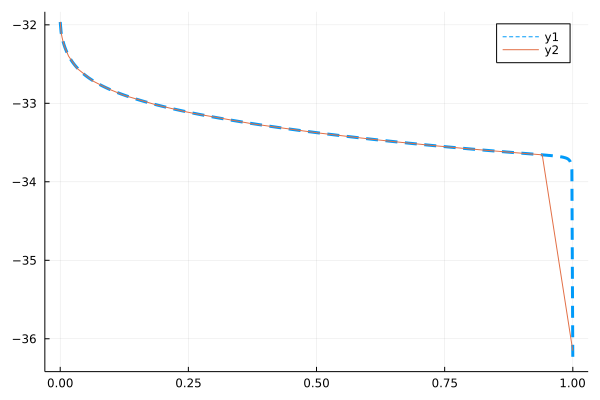

15.2


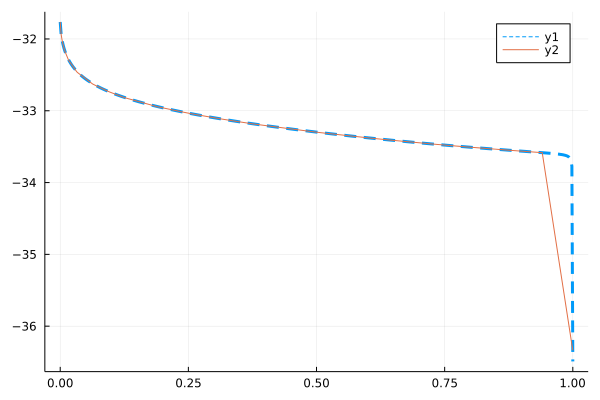

15.399999999999999


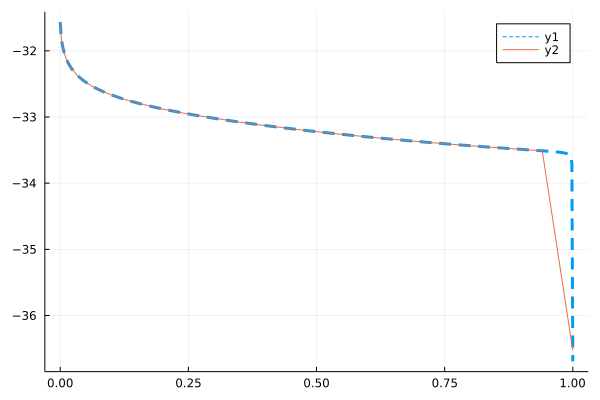

15.6


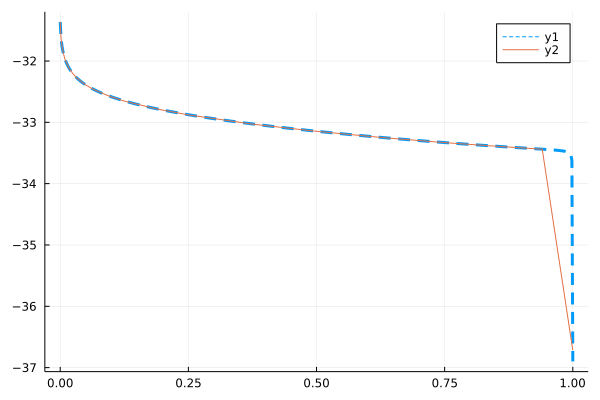

15.8


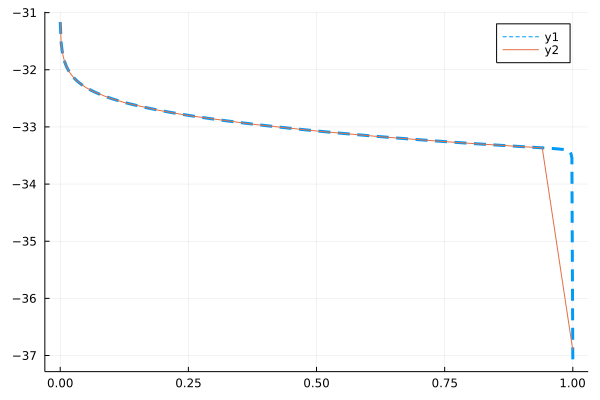

16.0


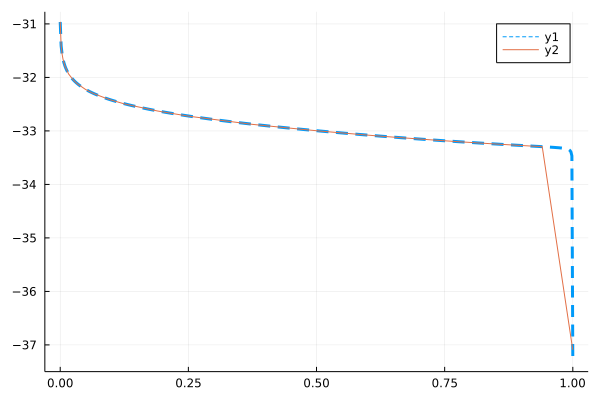

16.2


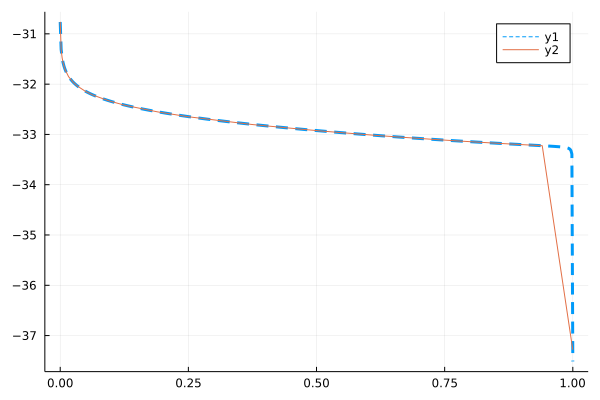

16.4


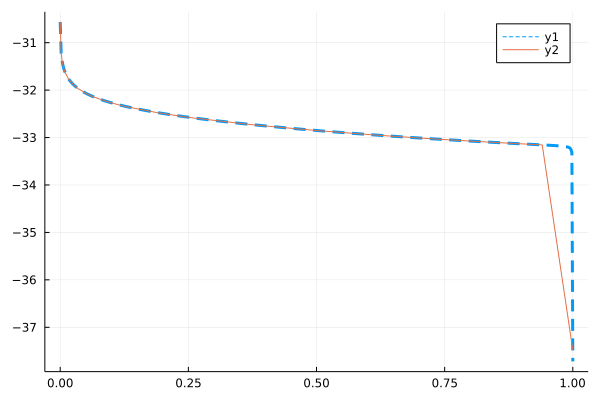

16.6


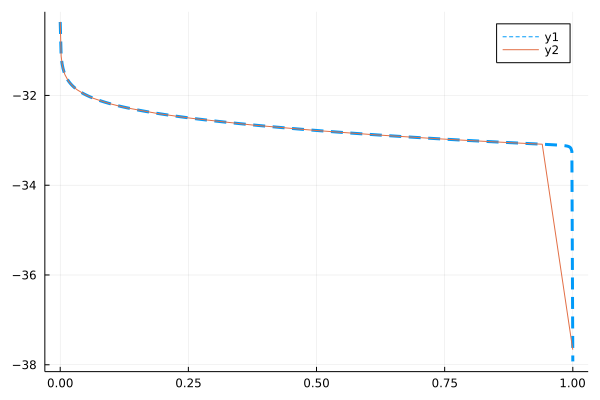

16.8


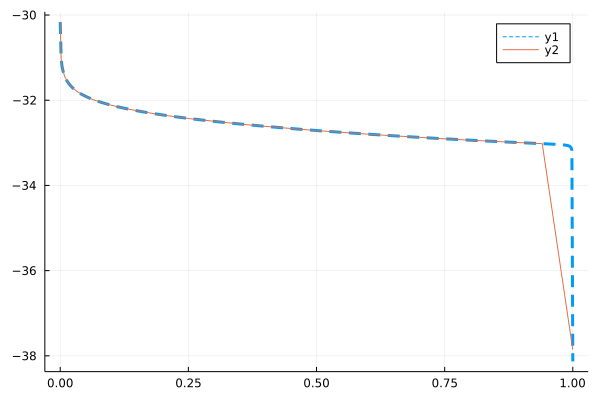

17.0


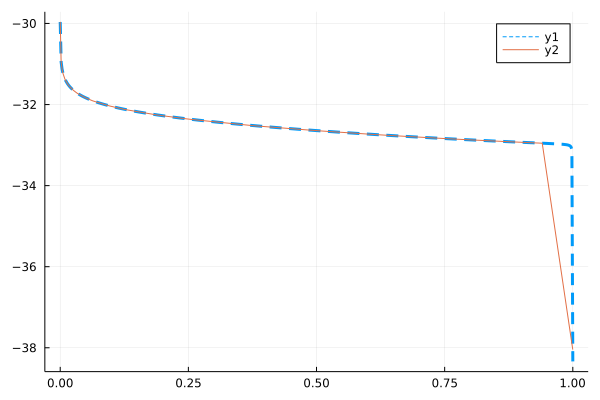

17.2


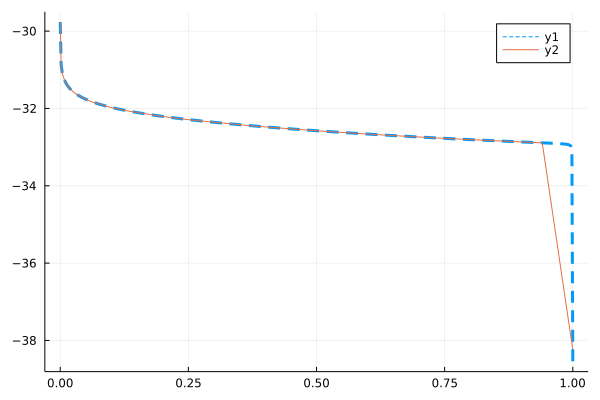

17.4


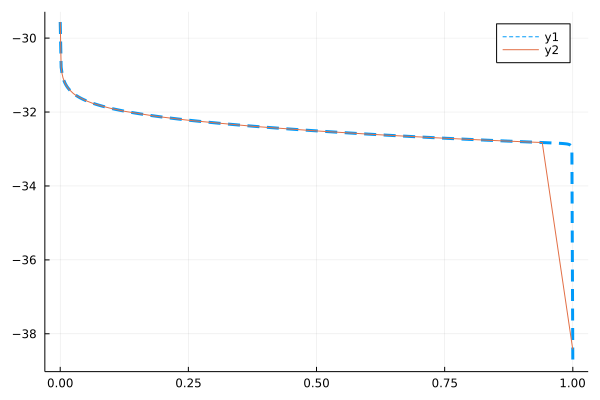

17.6


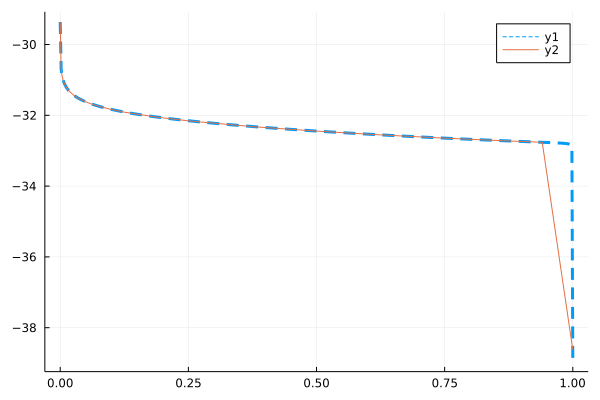

17.8


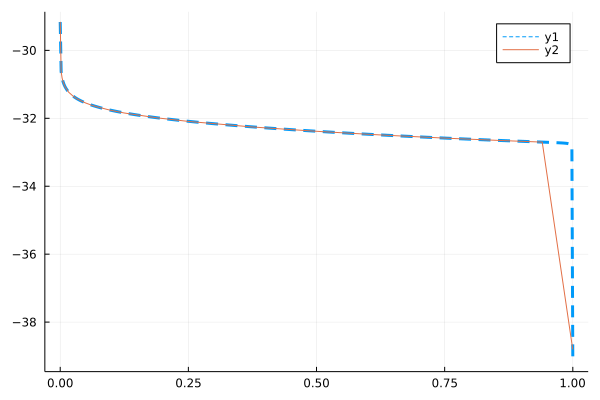

18.0


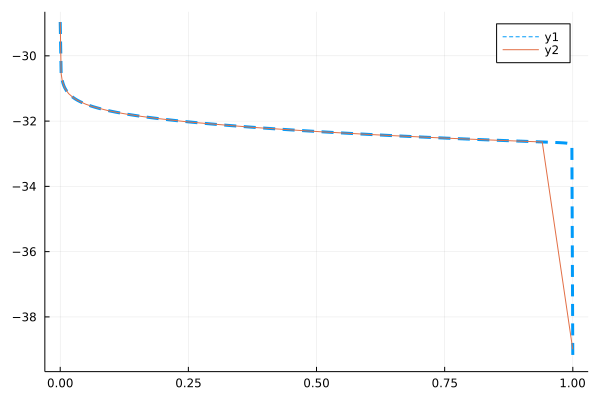

18.2


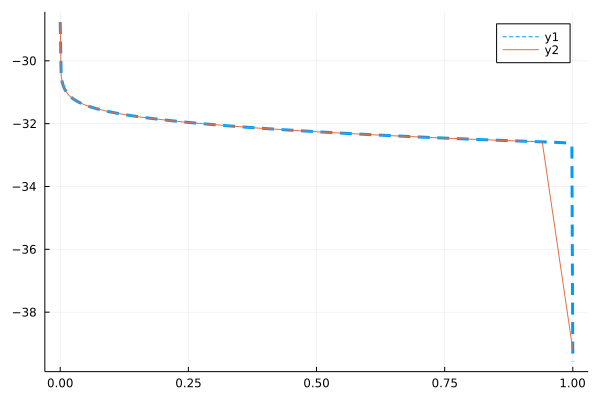

18.4


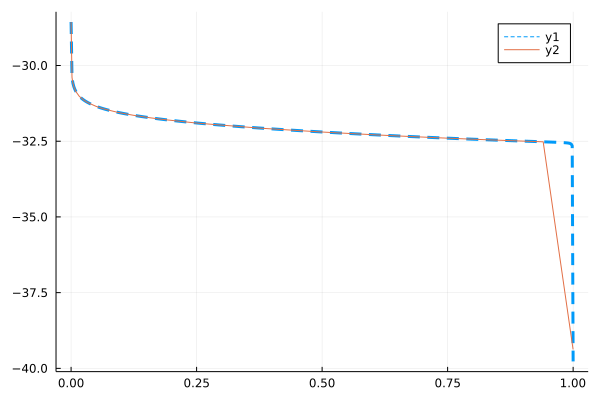

18.6


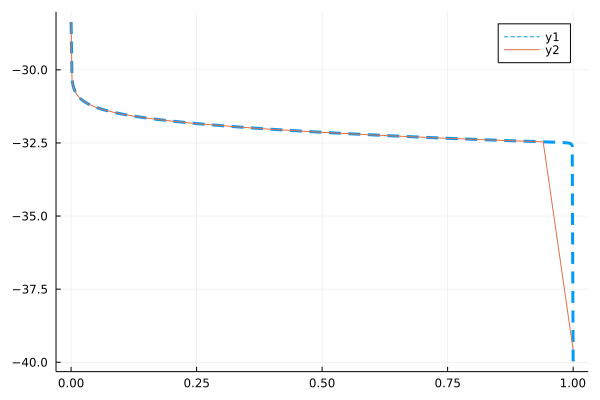

18.799999999999997


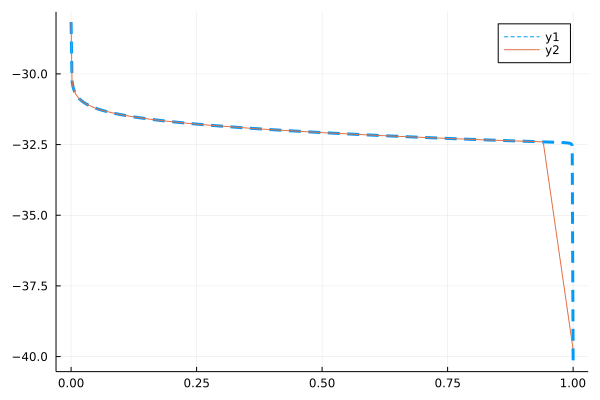

19.0


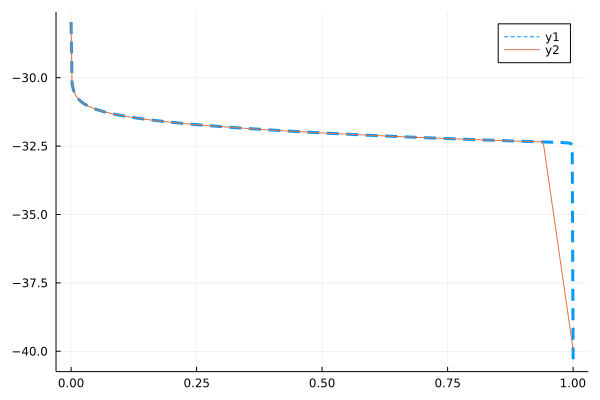

19.200000000000003


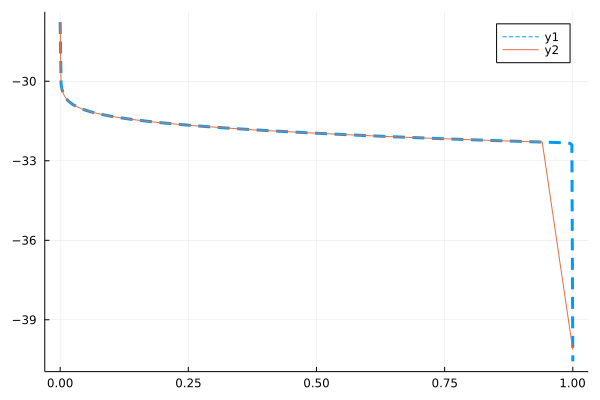

19.4


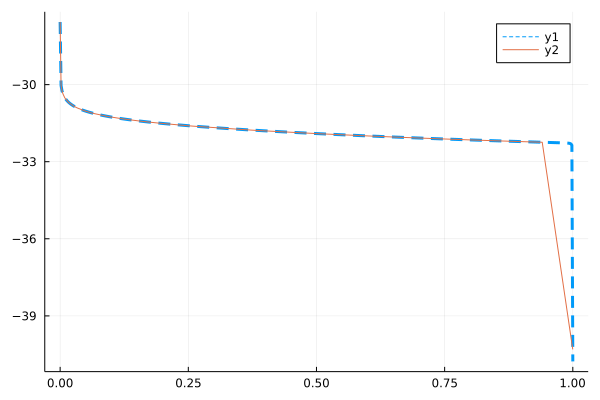

19.6


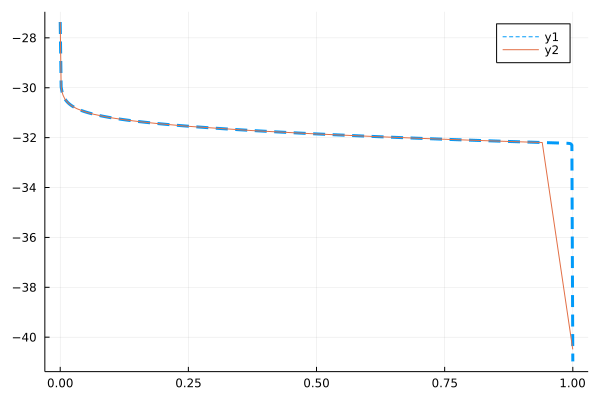

19.799999999999997


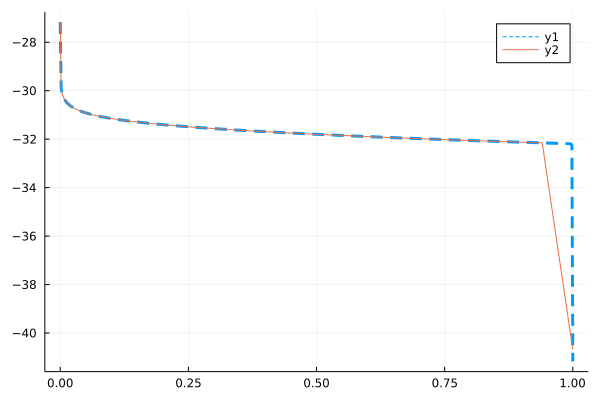

20.0


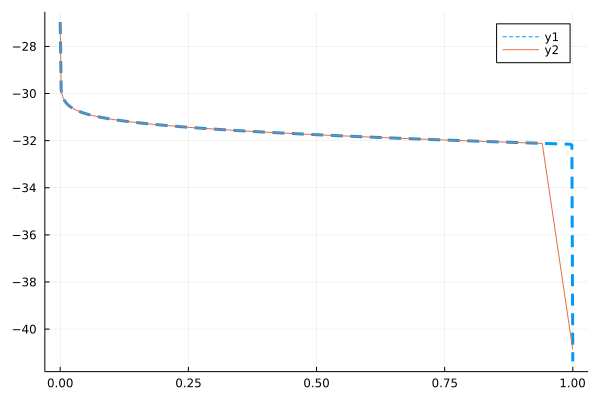

20.2


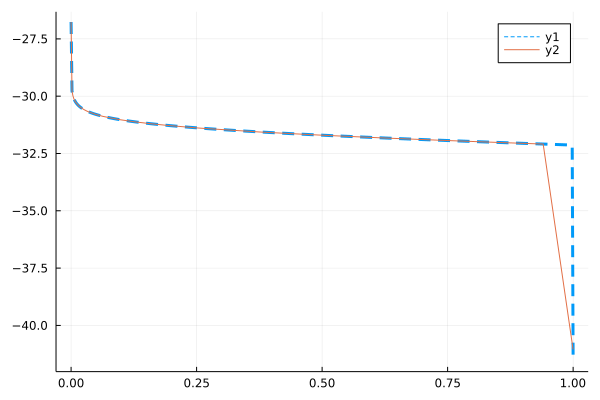

20.4


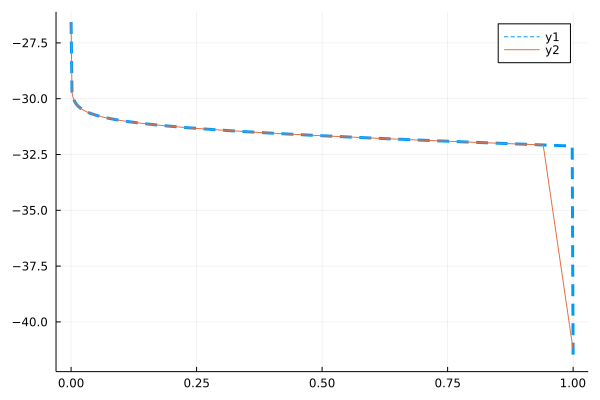

20.599999999999998


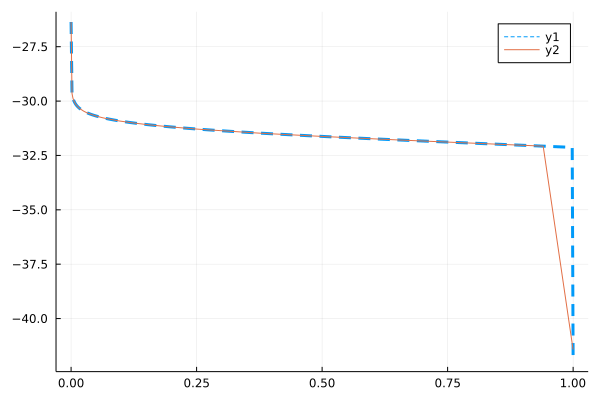

20.8


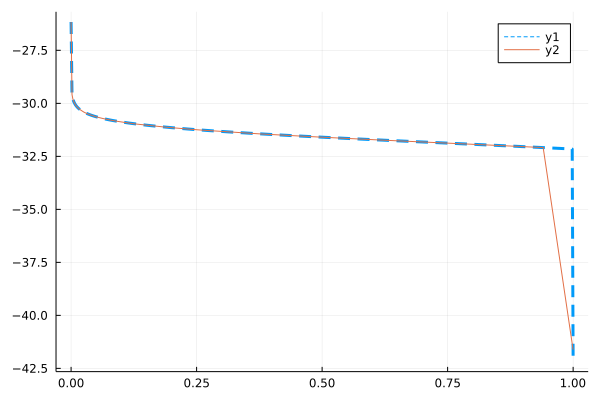

20.999999999999567


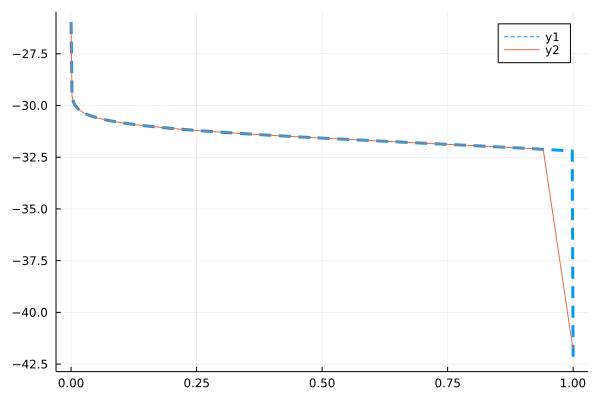

In [176]:
log_invzs = 10 .^ LinRange(-8, log(10.0, 0.9999), 301)
invzs = reverse(1 .- h5f["zs"][:])

for idx in 1:10:length(h5f["energies"][:])
    println(h5f["energies"][idx])
    dsdy = reverse(h5f["dsdy_CC_nu"][idx,:])
    fit1 = Spline1D(invzs, dsdy , w=ones(length(invzs)), k=1, bc="error", s=0.001)
    plt = plot(invzs, dsdy, lw=3, linestyle=:dash)
    plot!(plt, log_invzs, fit1.(log_invzs))
    # plot!(xaxis=:log)
    display(plt)
    # println(maximum([err/I for (I, err) in x]))
    # x = [quadgk(f, 0, z; rtol=1e-6)[1] for z in logzs]
    # cdfs[idx,:] = x ./ x[end]    
end

In [173]:
cdfs = zeros((size(h5f["dsdy_CC_nu"])[1], 301))

for idx in 1:size(cdfs)[1]
    dsdy = reverse(h5f["dsdy_CC_nu"][idx,:])
    fit1 = Spline1D(invzs, dsdy , w=ones(length(invzs)), k=1, bc="error", s=0.001)
    f(lx) = exp(lx) * 10 ^(fit1(exp(lx))) / 10^(fit1(0))
    x = [quadgk(f, log(1e-8), log(z); rtol=1e-6)[1] for z in log_invzs]
    # println(maximum([err/I for (I, err) in x]))
    # x = [quadgk(f, 0, z; rtol=1e-6)[1] for z in logzs]
    cdfs[idx,:] = x ./ x[end]    
end

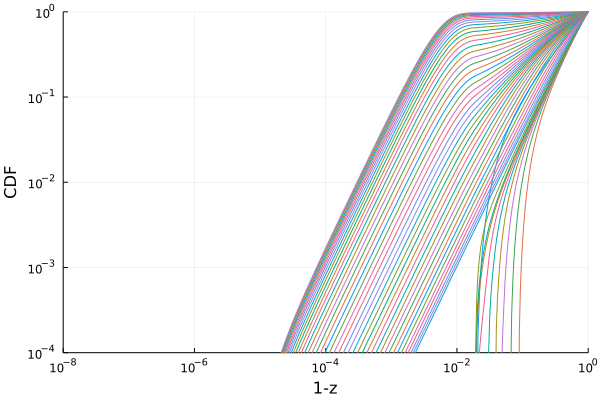

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/jlazar/.julia/packages/Plots/9C6z9/src/utils.jl:95
┌ Warning: Invalid negative or zer

In [174]:
plt = plot(log_invzs, cdfs[1, :], xaxis=:log, yaxis=:log, label="")
for idx in 1:10:501
    plot!(plt, logzs, cdfs[idx, :], xaxis=:log, yaxis=:log, label="")
end
plot!(plt, xlim=(1e-8,1), ylim=(1e-4, 1), xlabel="1-z", ylabel="CDF")
# plot!(plt, ones(2).*3.2843846148540925e-7, [1e-4, 1])
display(plt)

In [128]:
big_grid = zeros((501, 1000))
for idx in 1:501
    f1 = Spline1D(log.(logzs), log.(cdfs[idx, :]) , k=1, bc="nearest", s=0.001)
    intersections = []
    pvals = 0.001:0.001:1
    for p in pvals
        f′(lx) = exp(f1(lx)) - p
        if p == 0 
            val = 0.0
        elseif f′(1) > 0
            val = exp(find_zero(f′, -2))
        else
            val = 1
        end
        push!(intersections, val)
    end
    big_grid[idx,:] = intersections
end

In [147]:
plz = Spline2D(h5f["energies"][:], pvals, big_grid, kx=1, ky=1, bc="error");

LoadError: MethodError: no method matching Spline2D(::Vector{Float64}, ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, ::Matrix{Float64}; kx=1, ky=1, bc="error")
[0mClosest candidates are:
[0m  Spline2D(::AbstractVector, ::AbstractVector, ::AbstractMatrix; kx, ky, s) at ~/.julia/packages/Dierckx/0w6mc/src/Dierckx.jl:852[91m got unsupported keyword argument "bc"[39m
[0m  Spline2D(::Any, ::Any, ::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at ~/.julia/packages/Dierckx/0w6mc/src/Dierckx.jl:686[91m got unsupported keyword arguments "kx", "ky", "bc"[39m
[0m  Spline2D(::AbstractVector, ::AbstractVector, [91m::AbstractVector[39m; w, kx, ky, s) at ~/.julia/packages/Dierckx/0w6mc/src/Dierckx.jl:733[91m got unsupported keyword argument "bc"[39m
[0m  ...

In [ ]:
bins = 
Hist1D(ee, )

In [160]:
e = 7.43e17
u = rand(1000000)
ee = e .* (1 .- plz.(log(10.0, e), u))
bins = exp.(LinRange(log(minimum(ee)), log(maximum(ee)), 50))
h = Hist1D(log.(ee), nbins=50)

┌                              ┐ 
   [25.5, 26.0) ┤▏ 1                             
   [26.0, 26.5) ┤  0                             
   [26.5, 27.0) ┤  0                             
   [27.0, 27.5) ┤  0                             
   [27.5, 28.0) ┤  0                             
   [28.0, 28.5) ┤  0                             
   [28.5, 29.0) ┤▏ 1                             
   [29.0, 29.5) ┤▏ 1                             
   [29.5, 30.0) ┤  0                             
   [30.0, 30.5) ┤▏ 2                             
   [30.5, 31.0) ┤▏ 4                             
   [31.0, 31.5) ┤▏ 3                             
   [31.5, 32.0) ┤▏ 5                             
   [32.0, 32.5) ┤▏ 9                             
   [32.5, 33.0) ┤▏ 12                            
   [33.0, 33.5) ┤▏ 23                            
   [33.5, 34.0) ┤▏ 42                            
   [34.0, 34.5) ┤▏ 85                            
   [34.5, 35.0) ┤▏ 116                           
   [35.0, 35.5) ┤▏ 214                           
   [35.5, 36.0) ┤▏ 311                           
   [36.0, 36.5) ┤▏ 553                           
   [36.5, 37.0) ┤▏ 870                           
   [37.0, 37.5) ┤▏ 1438                          
   [37.5, 38.0) ┤▏ 2539                          
   [38.0, 38.5) ┤▎ 4459                          
   [38.5, 39.0) ┤▍ 7707                          
   [39.0, 39.5) ┤▌ 13819                         
   [39.5, 40.0) ┤▊ 27070                         
   [40.0, 40.5) ┤█▉ 60066                        
   [40.5, 41.0) ┤██████▋ 203768                  
   [41.0, 41.5) ┤██████████████████████  676882  
                └                              ┘ 
edges: 25.5:0.5:41.5
bin counts: [1, 0, 0, 0, 0, 0, 1, 1, 0, 2  …  870, 1438, 2539, 4459, 7707, 13819, 27070, 60066, 203768, 676882]
total count: 1000000

In [161]:
h.hist.edges

(25.5:0.5:41.5,)

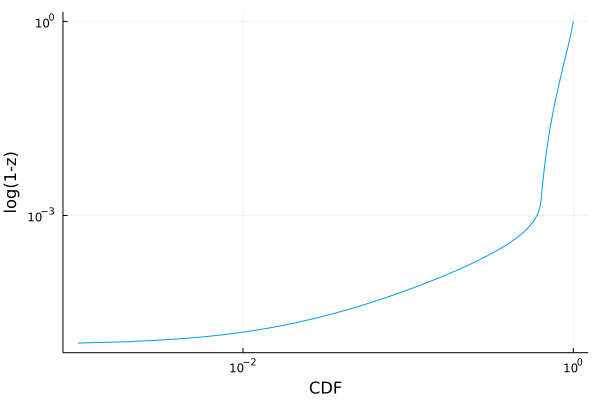

In [126]:
# plt = plot(
#     pvals, 
#     # intersections,
#     intersections,
#     xlabel="CDF",
#     ylabel="log(1-z)",
#     label="",
#     yaxis=:log,
#     xaxis=:log
# )
# # plot(plt, LinRange(0,1,50), ones(50).*log(10.0, 0.001))

In [97]:
log.(diff(intersections)[end-30:end])

31-element Vector{Float64}:
 -9.004718885141335
 -8.936871135465758
 -8.869093259100175
 -8.801385112274968
 -8.73374655166338
 -6.339009339296586
 -5.7390721305635175
 -5.1710253992063695
 -5.085957970031691
 -5.606346946825756
 -5.432963141620814
 -5.259756253518312
 -5.086725921846997
  ⋮
 -3.880427114054588
 -3.708796380933686
 -3.537339007246993
 -3.366054643141323
 -3.194942939822511
 -3.024003549548908
 -2.853236125629306
 -2.6826403224171393
 -2.512215795307076
 -2.3419622007307432
 -2.1718791961522617
 -2.001966440064475

In [57]:
h5f["zs"][:]

551-element Vector{Float64}:
 0.0
 0.0018181818181818182
 0.0036363636363636364
 0.005454545454545455
 0.007272727272727273
 0.00909090909090909
 0.01090909090909091
 0.012727272727272728
 0.014545454545454545
 0.016363636363636365
 0.01818181818181818
 0.02
 0.02181818181818182
 ⋮
 0.98
 0.9818181818181818
 0.9836363636363636
 0.9854545454545455
 0.9872727272727273
 0.9890909090909091
 0.990909090909091
 0.9927272727272727
 0.9945454545454545
 0.9963636363636363
 0.9981818181818182
 1.0

## Test with Alfonso stuff

In [163]:
test_h5f = h5open("/Users/jlazar/Downloads/test_forjeff.h5")

🗂️ HDF5.File: (read-only) /Users/jlazar/Downloads/test_forjeff.h5
├─ 🔢 dsdy_CC_nu
├─ 🔢 energies
└─ 🔢 zs

In [188]:
test_h5f["dsdy_CC_nu"][:,:]

8×301 Matrix{Float64}:
 1.0e-50      1.0e-50      1.0e-50      …  2.42656e-35  2.34802e-35
 1.0e-50      1.0e-50      1.0e-50         8.25444e-35  7.60847e-35
 1.0e-50      1.0e-50      1.0e-50         2.12687e-34  1.52187e-34
 1.0e-50      1.0e-50      1.0e-50         5.03864e-34  1.10535e-34
 5.57094e-31  5.56301e-31  5.55531e-31     1.10683e-33  2.12919e-35
 5.42488e-30  5.42177e-30  5.41858e-30  …  2.28045e-33  2.62048e-36
 5.13318e-29  5.1172e-29   5.10044e-29     4.43998e-33  2.96889e-37
 3.58422e-28  3.5291e-28   3.47359e-28     7.5806e-33   3.27309e-38

In [204]:
invzs_file = 1 .- test_h5f["zs"][:]

301-element Vector{Float64}:
 9.999999994736442e-8
 1.0551964790828094e-7
 1.1134396094014676e-7
 1.1748975548009355e-7
 1.239747763337462e-7
 1.3081774741241503e-7
 1.3803842646709086e-7
 1.45657661598797e-7
 1.5369745154369951e-7
 1.6218100973297567e-7
 1.7113283046210626e-7
 1.8057876005617146e-7
 1.9054607180990502e-7
 ⋮
 0.5537749841508908
 0.5843414133735175
 0.6165950018614822
 0.6506288748655573
 0.6865412978224551
 0.7244359600749906
 0.764422274252601
 0.8066156921766143
 0.8511380382023777
 0.898117860960696
 0.9476908045141591
 1.0

13.0


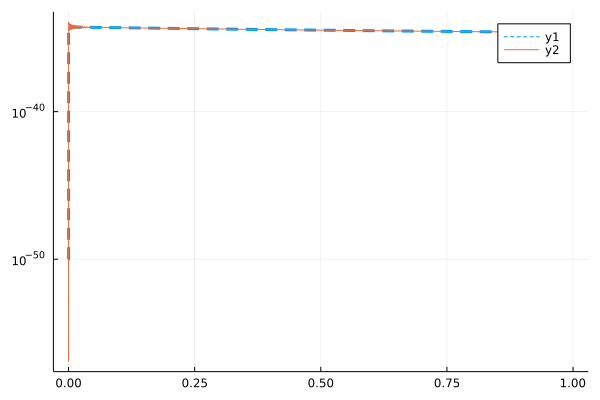

14.0


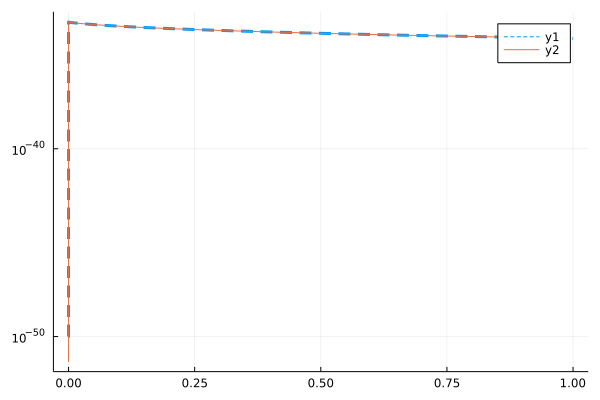

15.0


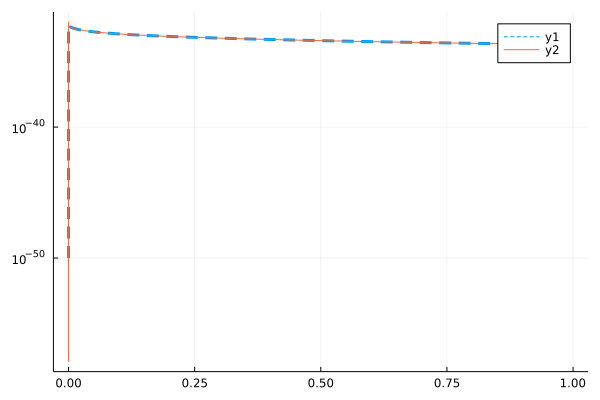

16.0


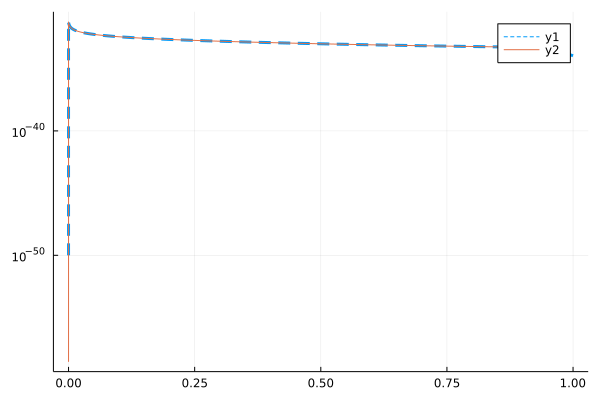

17.0


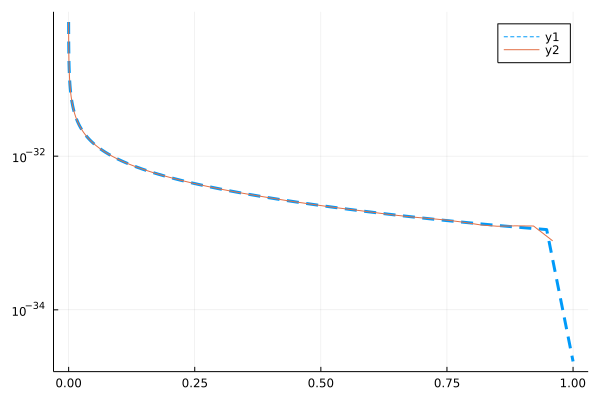

18.0


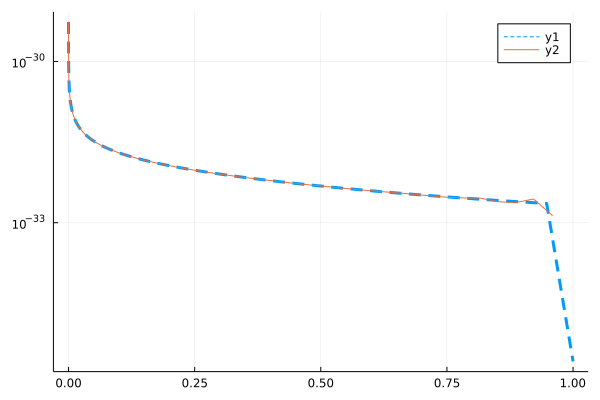

19.0


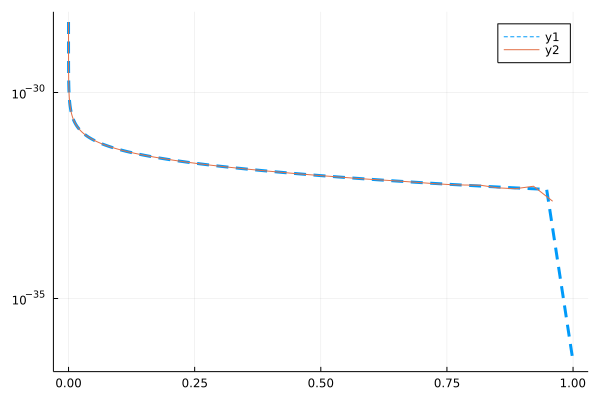

20.0


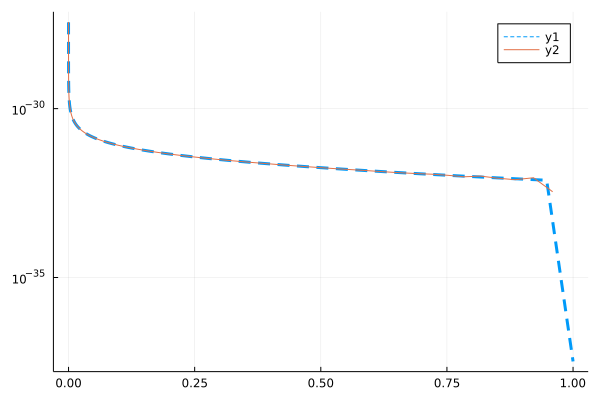

In [295]:
invzs_fine = 10 .^ LinRange(-7, log(10.0, 0.999), 401)[1:end-1]
invzs_file = 1 .- test_h5f["zs"][:]

for idx in 1:length(test_h5f["energies"][:])
    println(test_h5f["energies"][idx])
    dsdy = test_h5f["dsdy_CC_nu"][idx,:]
    fit1 = Spline1D(log.(invzs_file), log.(dsdy), k=2, bc="error", s=0.01)
    plt = plot(invzs_file, dsdy, lw=3, linestyle=:dash)
    plot!(plt, invzs_fine, exp.(fit1.(log.(invzs_fine))))
    plot!(yaxis=:log)
    display(plt)
    # println(maximum([err/I for (I, err) in x]))
    # x = [quadgk(f, 0, z; rtol=1e-6)[1] for z in logzs]
    # cdfs[idx,:] = x ./ x[end]    
end

In [296]:
cdfs

8×400 Matrix{Float64}:
 -5.41789e-17  -5.32309e-17  …  0.992924  0.995332  0.99769   1.0
 -4.71747e-18  -4.63492e-18     0.997871  0.998606  0.999315  1.0
 -3.9136e-12   -3.74891e-12     0.999471  0.999655  0.999831  1.0
 -0.200698     -0.200698        0.999856  0.999903  0.999953  1.0
 -0.41133      -0.404036        0.999953  0.99997   0.999985  1.0
 -0.664203     -0.652458     …  0.999984  0.999989  0.999995  1.0
 -1.28151      -1.25621         0.999993  0.999995  0.999998  1.0
 -2.21252      -2.15531         0.999997  0.999997  0.999999  1.0

In [297]:
# cdfs = zeros((length(test_h5f["energies"]), 301))



# idx = 1
# println(test_h5f["energies"][idx])
# dsdy = test_h5f["dsdy_CC_nu"][idx,:]
# fit1 = Spline1D(log.(invzs_file), log.(dsdy), k=2, bc="error", s=0.01)
# f(lx) = exp(lx) * exp.(fit1(lx)) / exp(fit1(0))

# x = [quadgk(f, log(1e-6), log(z); rtol=1e-6)[1] for z in invzs_fine]
# # println(maximum([err/I for (I, err) in x]))
# # x = [quadgk(f, 0, z; rtol=1e-6)[1] for z in logzs]
# cdfs[idx,:] = x ./ x[end]   

In [305]:
cdfs = zeros((length(test_h5f["energies"]), length(invzs_fine)))

for idx in 1:size(cdfs)[1]
    println(test_h5f["energies"][idx])
    dsdy = test_h5f["dsdy_CC_nu"][idx,:]
    # fit1 = Spline1D(log.(invzs_file[1:end-1]), log.(dsdy[1:end-1] ./ diff(invzs_file)), k=2, bc="extrapolate", s=0.01)
    fit1 = Spline1D(log.(invzs_file), log.(dsdy), k=2, bc="error", s=0.01)
    f(lx) = exp(lx) * exp.(fit1(lx)) / exp(fit1(0))
    x = [quadgk(f, log(1e-6), log(z); rtol=1e-6)[1] for z in invzs_fine]
    cdfs[idx,:] = x ./ x[end]
end

13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


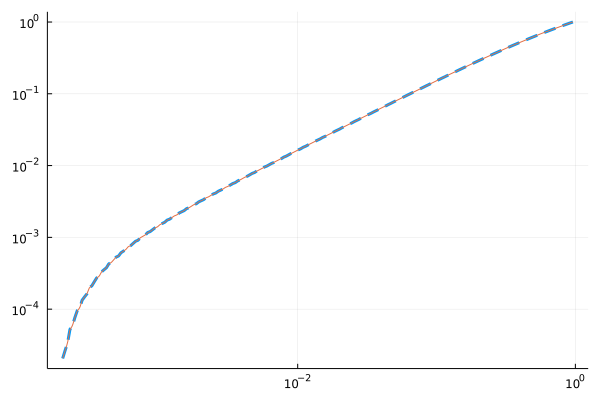

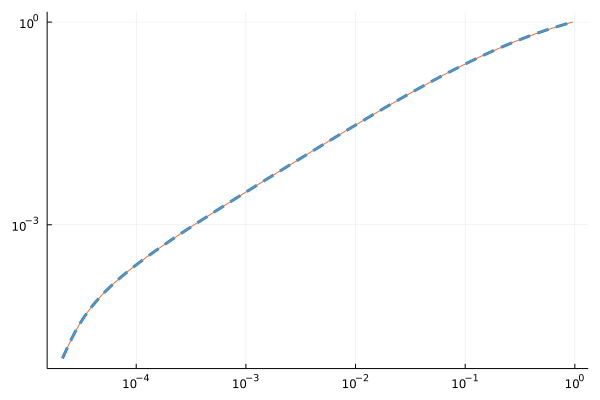

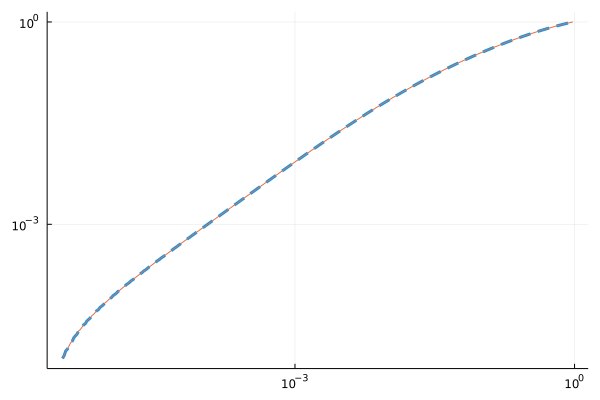

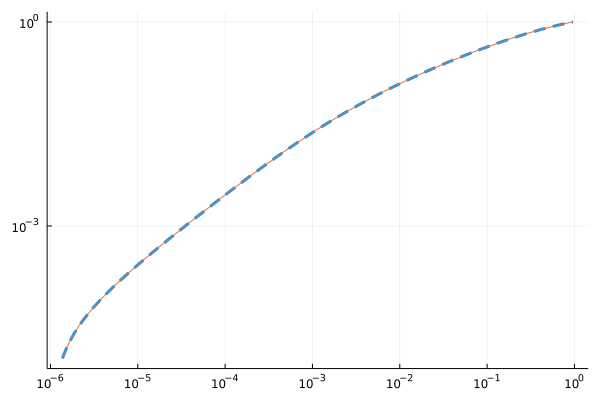

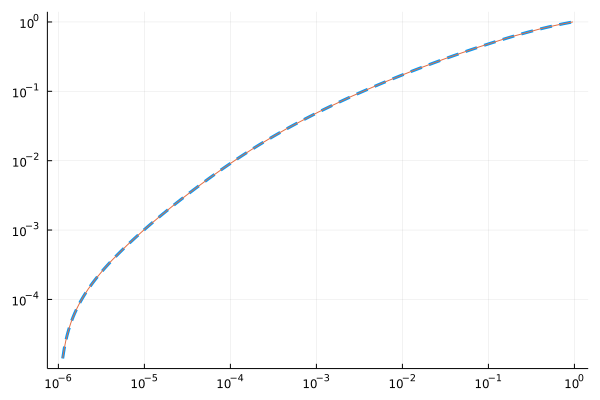

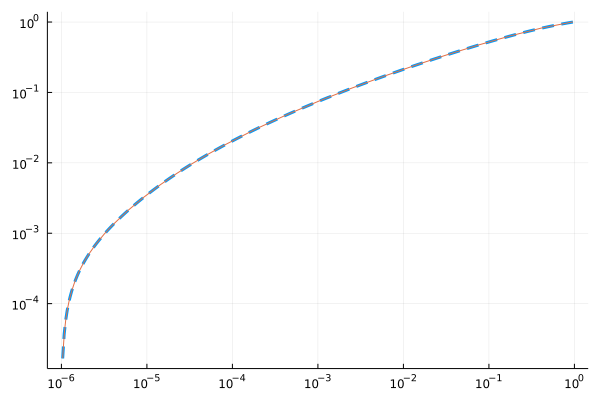

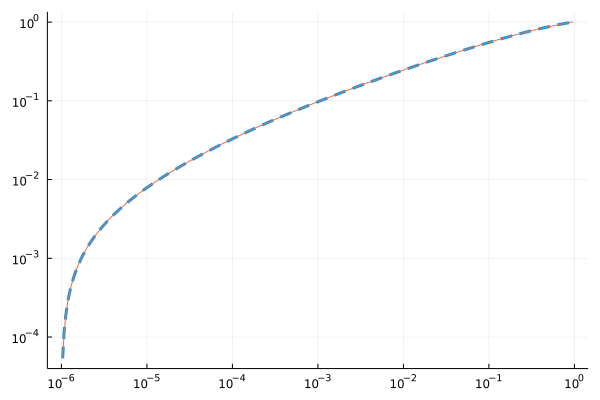

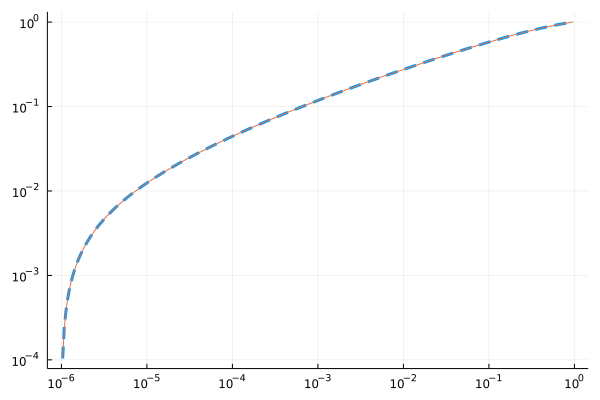

8×1001 Matrix{Float64}:
 0.0  0.000743423  0.00129919   …  0.951266  0.952603  0.95394   1.0
 0.0  0.000338308  0.000661468     0.942257  0.944154  0.946053  1.0
 0.0  0.000115529  0.000232302     0.948363  0.951172  0.953986  1.0
 0.0  3.49765e-5   6.97815e-5      0.945063  0.948462  0.951869  1.0
 0.0  9.83086e-6   1.91949e-5      0.943413  0.947306  0.951212  1.0
 0.0  3.23312e-6   5.72529e-6   …  0.927781  0.931712  0.935655  1.0
 0.0  1.71285e-6   2.53114e-6      0.925194  0.929489  0.933799  1.0
 0.0  1.36322e-6   1.77838e-6      0.917737  0.922487  0.927256  1.0

In [330]:
ps = 0.0:0.001:1
plz = zeros((length(test_h5f["energies"]), length(ps)))

for idx in 1:length(test_h5f["energies"])
    cdf = cdfs[idx, :]
    mask = cdf .> 1e-5
    fit = Spline1D(log.(invzs_fine[mask]), log.(cdf[mask]), k=1, s=0.001, bc="extrapolate")
    plt = plot(invzs_fine[mask], cdf[mask], lw=3, linestyle=:dash, label="")
    dum = exp.(LinRange(log(invzs_fine[mask][1]), log(invzs_fine[mask][end]), 500))
    plot!(plt, dum, exp.(fit.(log.(dum))), label="")
    plot!(plt, xaxis=:log, yaxis=:log)
    display(plt)
    ahhhh = []
    for p in ps
        if p == 1
            push!(ahhhh, 1)
        elseif p == 0
            push!(ahhhh, 0)
        else
            f′(lx) = exp(fit(lx)) - p
            root = find_zero(f′, log(0.5))
            push!(ahhhh, exp(root))
        end
    end
    plz[idx, :] = ahhhh
end
plz

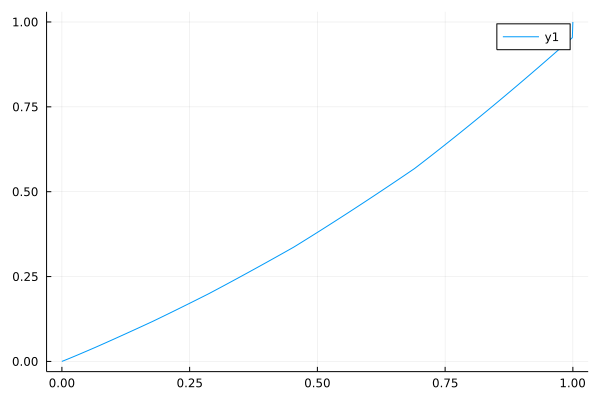

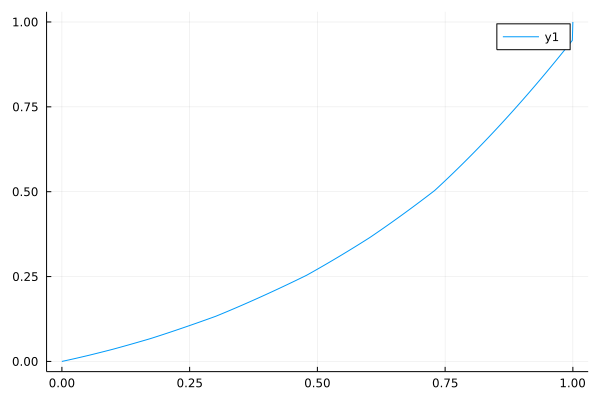

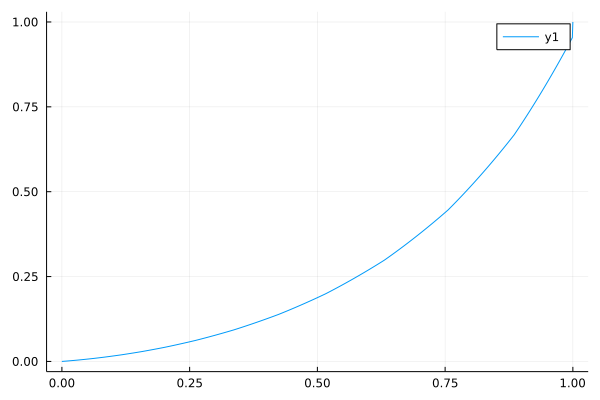

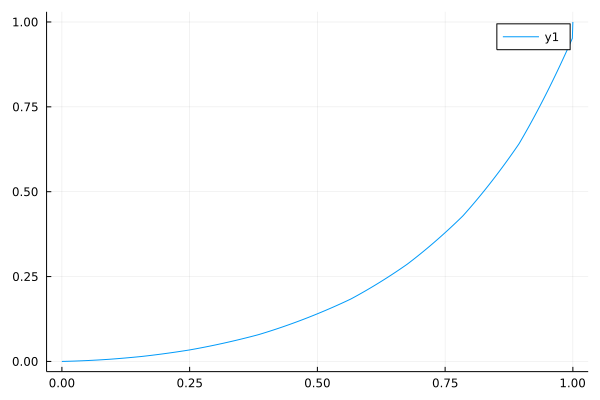

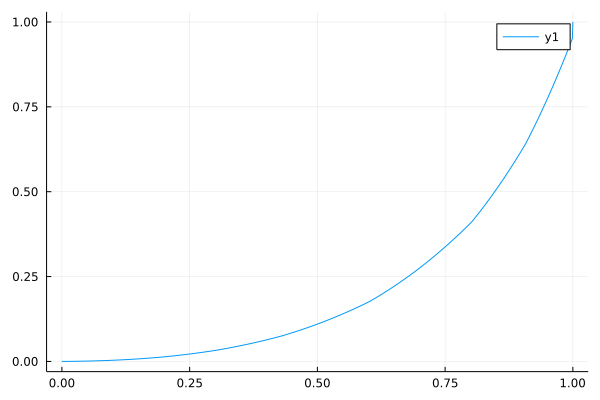

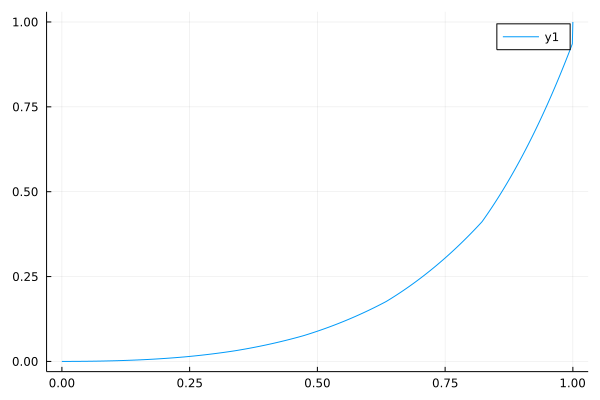

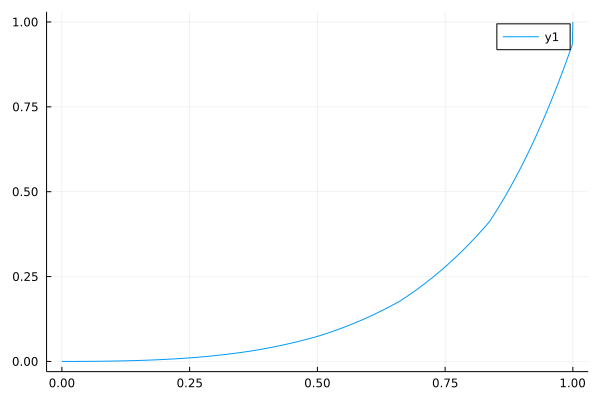

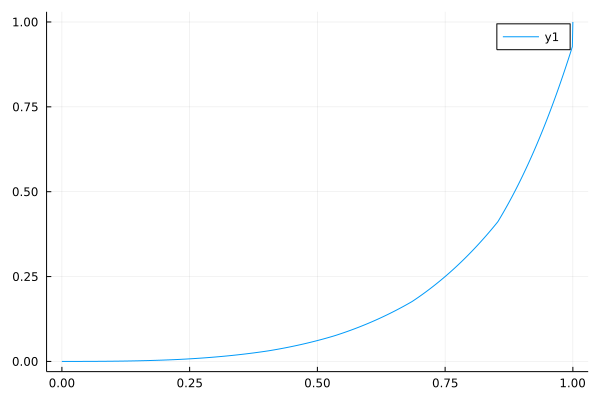

In [331]:
for idx in 1:8
    plt = plot(LinRange(0,1, 1001), plz[idx,:])
    display(plt)
end

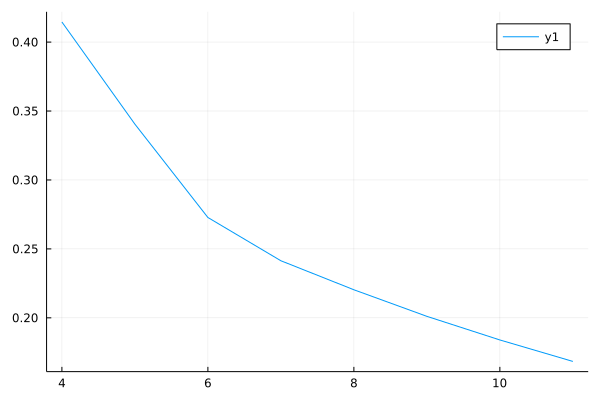

In [332]:
inelast = []
for idx in 1:length(test_h5f["energies"])
    send_help = Spline1D(LinRange(0,1, 1001), plz[idx,:], k=1, s=0.0000001)
    zs = 1 .- send_help.(rand(10000))
    push!(inelast, 1 - sum(zs) / length(zs))
end
plot(test_h5f["energies"][:].-9, inelast)
# println((minimum(zs), maximum(zs)))

8×1001 Matrix{Float64}:
 0.0  0.000743423  0.00129919   …  0.951266  0.952603  0.95394   1.0
 0.0  0.000338308  0.000661468     0.942257  0.944154  0.946053  1.0
 0.0  0.000115529  0.000232302     0.948363  0.951172  0.953986  1.0
 0.0  3.49765e-5   6.97815e-5      0.945063  0.948462  0.951869  1.0
 0.0  9.83086e-6   1.91949e-5      0.943413  0.947306  0.951212  1.0
 0.0  3.23312e-6   5.72529e-6   …  0.927781  0.931712  0.935655  1.0
 0.0  1.71285e-6   2.53114e-6      0.925194  0.929489  0.933799  1.0
 0.0  1.36322e-6   1.77838e-6      0.917737  0.922487  0.927256  1.0

In [438]:
diff(ee)

30-element Vector{Float64}:
 0.1880192912684162
 0.19073861849065388
 0.1934972754034323
 0.19629583083294833
 0.19913486183234141
 0.20201495380069545
 0.20493670060371372
 0.2079007046962058
 0.2109075772462905
 0.2139579382614567
 0.21705241671630304
 0.2201916506824002
 0.22337628745965787
 ⋮
 0.24347501278333183
 0.24699639734833667
 0.2505687117772055
 0.25419269266969735
 0.25786908727903324
 0.261598653665974
 0.26538216085513255
 0.26922038899353495
 0.2731141295114945
 0.27706418528582333
 0.2810713708053072
 0.2851365123387417

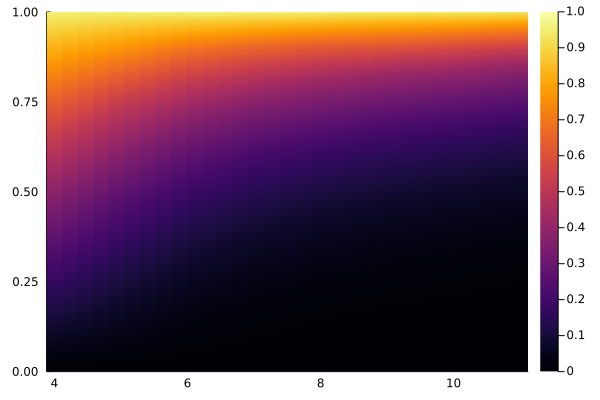

In [440]:
spl = Spline2D(test_h5f["energies"][:], ps, plz, kx=1, ky=1)
ee = LinRange(test_h5f["energies"][1], test_h5f["energies"][end], 31)
# ee = exp.(LinRange(log(test_h5f["energies"][1]), log(test_h5f["energies"][end]), 31))
heatmap((ee.-9), ps, reshape([spl(e, p) for e in ee for p in ps], (length(ps), length(ee))))

In [441]:
inelast = []
for e in ee
    zs = 1 .- spl.(e, rand(10000))
    println(maximum(zs))
    push!(inelast, 1 - sum(zs) / length(zs))
end

0.9999868303951729
0.9999080283638853
0.9997750473829321
0.9999797780251833
0.9999057013723925
0.9999930688200823
0.999986261819519
0.9999902894149669
0.9999815910513827
0.9999655615017127
0.9999998277082228
0.9999518313072454
0.9999988993880953
0.9999983178751509
0.9999988025820977
0.9999952459734146
0.9999974088403534
0.9999993367206892
0.9999996027841912
0.9999993698832722
0.9999994816970705
0.9999992439060237
0.9999999399815575
0.9999986592929734
0.9999997284328177
0.9999999329129463
0.9999996921388415
0.9999999945171568
0.9999997277684783
0.9999999230417658
0.9999998156658796


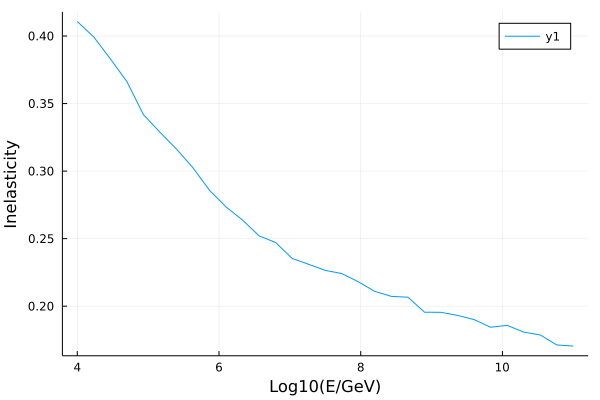

In [442]:
plot(ee .- 9, inelast, xlabel="Log10(E/GeV)", ylabel="Inelasticity")

In [447]:
outfile = h5open("../../resources/cross_sections/tables/csms_differential_cdfs.h5", "w")

🗂️ HDF5.File: (read-write) ../../resources/cross_sections/tables/csms_differential_cdfs.h5

In [448]:
dsets = [plz, plz, ps, test_h5f["energies"][:]]
dset_names = ["nu_cc_cdf","nubar_cc_cdf", "cdf_vals", "log10_es"]
for (dset, name) in zip(dsets, dset_names)
    create_dataset(outfile, name, dset)
    if occursin("nu", name)
        outfile[name][:,:] = dset
    else
        outfile[name][:] = dset
    end
end


In [449]:
close(outfile)

In [446]:
plz

8×1001 Matrix{Float64}:
 0.0  0.000743423  0.00129919   …  0.951266  0.952603  0.95394   1.0
 0.0  0.000338308  0.000661468     0.942257  0.944154  0.946053  1.0
 0.0  0.000115529  0.000232302     0.948363  0.951172  0.953986  1.0
 0.0  3.49765e-5   6.97815e-5      0.945063  0.948462  0.951869  1.0
 0.0  9.83086e-6   1.91949e-5      0.943413  0.947306  0.951212  1.0
 0.0  3.23312e-6   5.72529e-6   …  0.927781  0.931712  0.935655  1.0
 0.0  1.71285e-6   2.53114e-6      0.925194  0.929489  0.933799  1.0
 0.0  1.36322e-6   1.77838e-6      0.917737  0.922487  0.927256  1.0

In [396]:
create_dataset.(Ref(outfile), ["cdf_val", "log10_ee"], [ps, ee])

2-element Vector{Tuple{HDF5.Dataset, HDF5.Datatype}}:
 (HDF5.Dataset: /cdf_val (file: ../../resources/cross_sections/tables/csms_differential_cdfs.h5 xfer_mode: 0), HDF5.Datatype: H5T_IEEE_F64LE)
 (HDF5.Dataset: /log10_ee (file: ../../resources/cross_sections/tables/csms_differential_cdfs.h5 xfer_mode: 0), HDF5.Datatype: H5T_IEEE_F64LE)

In [398]:
outfile["log10_ee"][:] = ee

31-element Vector{Float64}:
 13.0
 13.188019291268416
 13.37875790975907
 13.572255185162502
 13.76855101599545
 13.967685877827792
 14.169700831628488
 14.374637532232201
 14.582538236928407
 14.793445814174698
 15.007403752436154
 15.224456169152457
 15.444647819834858
  ⋮
 17.077785709469715
 17.324782106818052
 17.575350818595258
 17.829543511264955
 18.087412598543988
 18.349011252209962
 18.614393413065095
 18.88361380205863
 19.156727931570124
 19.433792116855948
 19.714863487661255
 19.999999999999996

In [399]:
close(outfile)

In [400]:
fsd = h5open("../../resources/cross_sections/tables/csms_differential_cdfs.h5", "r")

🗂️ HDF5.File: (read-only) ../../resources/cross_sections/tables/csms_differential_cdfs.h5
├─ 🔢 cdf_val
├─ 🔢 log10_ee
├─ 🔢 nu_CDF
└─ 🔢 nubar_CDF

In [404]:
fsd["nu_CDF"][:,:]

8×1001 Matrix{Float64}:
 0.0  0.000743423  0.00129919   …  0.951266  0.952603  0.95394   1.0
 0.0  0.000338308  0.000661468     0.942257  0.944154  0.946053  1.0
 0.0  0.000115529  0.000232302     0.948363  0.951172  0.953986  1.0
 0.0  3.49765e-5   6.97815e-5      0.945063  0.948462  0.951869  1.0
 0.0  9.83086e-6   1.91949e-5      0.943413  0.947306  0.951212  1.0
 0.0  3.23312e-6   5.72529e-6   …  0.927781  0.931712  0.935655  1.0
 0.0  1.71285e-6   2.53114e-6      0.925194  0.929489  0.933799  1.0
 0.0  1.36322e-6   1.77838e-6      0.917737  0.922487  0.927256  1.0

In [405]:
close(fsd)

In [406]:
spl

Spline2D([13.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.0], [0.0, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008  …  0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007434234521428062, 0.00033830823387660645  …  0.9337986944675696, 0.9272558361285022, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1, 1, 0.0)